# DS CONNECT 11
## How to build your own image classifier with limited images

Note: Code is highly abstracted. Bulk of the logic is in utils.py

Import the necessary libraries first

In [1]:
import gc
gc.collect()
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0" # Select GPU #0
import keras
import utils
%matplotlib inline

Using TensorFlow backend.


Split the images into test and train folders with the preprocess function

In [2]:
utils.preprocess(test_percentage=0.50, augment=False)

Lets take a look at some images in our datasets

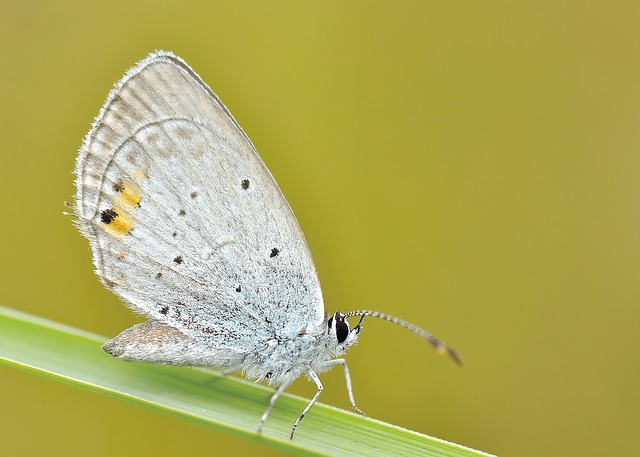

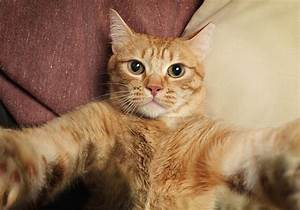

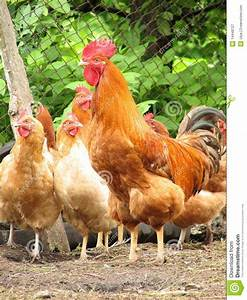

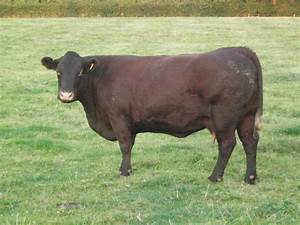

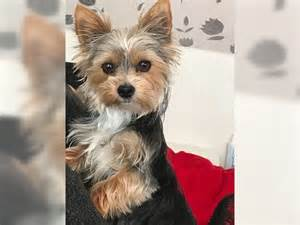

In [3]:
utils.show_data()

## How to perform transfer learning

Create CNN Base of pretrained model

In [4]:
# Use transfer learning for feature extraction
feature_extractor = utils.create_conv_base() # MobileNet Base

Instructions for updating:
Colocations handled automatically by placer.


Extract features and labels from the images

In [5]:
train_features, train_labels = utils.extract_features(feature_extractor, 'train', utils.num_samples('train'))
test_features, test_labels = utils.extract_features(feature_extractor, 'test', utils.num_samples('test'))
train_features, test_features = utils.reshape_features(train_features), utils.reshape_features(test_features) #flatten features to 1-D vector

Found 250 images belonging to 5 classes.
Found 250 images belonging to 5 classes.


Create multi-layer-perceptron network for training the features

In [6]:
mlp = utils.create_MLP() # unfrozen part

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Compile the mlp

In [7]:
utils.compile(mlp)

Train the mlp

In [8]:
#utils.train_MLP(mlp, train_features, train_labels, test_features, test_labels, 5000, 'mlp.h5') # 141 epochs
mlp = keras.models.load_model("mlp.h5")

Instructions for updating:
Use tf.cast instead.


Evaluate the mlp

In [9]:
utils.evaluate_MLP(mlp, test_features, test_labels)

250/250 [==============================] - 0s 752us/step
Accuracy: 0.8959999976158142


We get much better results even with less training time

# What if you have less training data? 
## We will simulate this by only using 10% of data as training data.

In [10]:
utils.preprocess(test_percentage=0.90, augment=False) # Use only 10% of data as training data

In [11]:
train_features, train_labels = utils.extract_features(feature_extractor, 'train', utils.num_samples('train'))
test_features, test_labels = utils.extract_features(feature_extractor, 'test', utils.num_samples('test'))
train_features, test_features = utils.reshape_features(train_features), utils.reshape_features(test_features)

Found 50 images belonging to 5 classes.
Found 450 images belonging to 5 classes.


In [12]:
mlp2 = utils.create_MLP()
utils.compile(mlp2)
#utils.train_MLP(mlp2, train_features, train_labels, test_features, test_labels, 5000, 'mlp2.h5') # 453 epochs
mlp2 = keras.models.load_model("mlp2.h5")

In [13]:
utils.evaluate_MLP(mlp2, test_features, test_labels)

450/450 [==============================] - 0s 667us/step
Accuracy: 0.8


Notice that we get much poorer results when we use significantly less data

Let's see how we can improve this further with data augmentation, which is particularly useful when we have a small dataset

How this works is that we augment the images randomly before extracting features

We will compare the results with and without image augmentation

In [14]:
utils.preprocess(test_percentage=0.90, augment=True) # Also use 10% of data as training data, but augment to x10 the size

Found 50 images belonging to 5 classes.


In [15]:
train_features, train_labels = utils.extract_features(feature_extractor, 'aug_train', utils.num_samples('aug_train'))
test_features, test_labels = utils.extract_features(feature_extractor, 'test', utils.num_samples('test'))
train_features, test_features = utils.reshape_features(train_features), utils.reshape_features(test_features)

Found 500 images belonging to 5 classes.
Found 450 images belonging to 5 classes.


Lets look at some augmented images

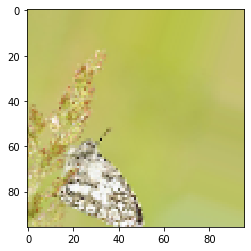

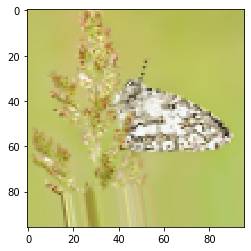

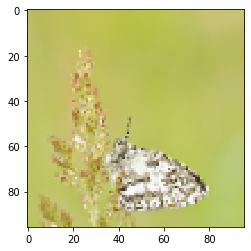

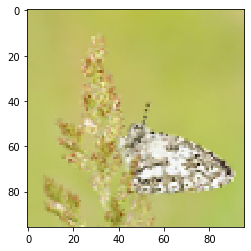

In [16]:
utils.show_augment_image() # go to aug_train folder to see images

Let's see the results. We create, compile and train the MLP

In [17]:
mlp3 = utils.create_MLP()
utils.compile(mlp3)
#utils.train_MLP(mlp3, train_features, train_labels, test_features, test_labels, 5000, 'mlp3.h5') # 92 epochs
mlp3 = keras.models.load_model("mlp3.h5")

In [18]:
utils.evaluate_MLP(mlp3, test_features, test_labels)

450/450 [==============================] - 0s 631us/step
Accuracy: 0.8666666666666667


Notice that we get much better accuracy because we 'expanded' our dataset through image augmentation.

## Lets have some fun predicting images with our classifer

We use mlp which is our classifier trained on 50% of the data

Found 14 images belonging to 1 classes.


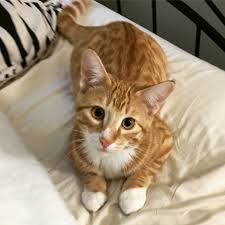

{
    "input_file": "C:\\Users\\BriefCam\\Desktop\\dsconnect\\predict\\images\\download (1).jpg",
    "probabilities": [
        {
            "butterfly": 3.0996605346444994e-05
        },
        {
            "cat": 0.9977583885192871
        },
        {
            "chicken": 0.0015459287678822875
        },
        {
            "cow": 0.000252164201810956
        },
        {
            "dog": 0.0004125111736357212
        }
    ],
    "label": "cat"
}


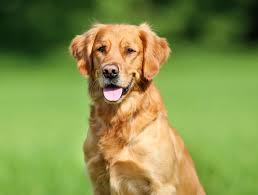

{
    "input_file": "C:\\Users\\BriefCam\\Desktop\\dsconnect\\predict\\images\\download (2).jpg",
    "probabilities": [
        {
            "butterfly": 0.0001267672050744295
        },
        {
            "cat": 0.0001921793445944786
        },
        {
            "chicken": 0.00022409643861465156
        },
        {
            "cow": 0.00027133390540257096
        },
        {
            "dog": 0.9991856217384338
        }
    ],
    "label": "dog"
}


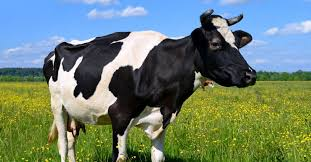

{
    "input_file": "C:\\Users\\BriefCam\\Desktop\\dsconnect\\predict\\images\\download (3).jpg",
    "probabilities": [
        {
            "butterfly": 0.00022951254504732788
        },
        {
            "cat": 1.2709158909274265e-05
        },
        {
            "chicken": 0.0006130697438493371
        },
        {
            "cow": 0.9969366788864136
        },
        {
            "dog": 0.0022080037742853165
        }
    ],
    "label": "cow"
}


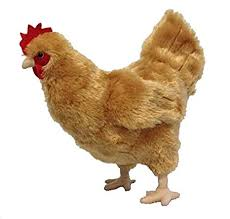

{
    "input_file": "C:\\Users\\BriefCam\\Desktop\\dsconnect\\predict\\images\\download (4).jpg",
    "probabilities": [
        {
            "butterfly": 1.7926946384250186e-05
        },
        {
            "cat": 0.000238640554016456
        },
        {
            "chicken": 0.9996398687362671
        },
        {
            "cow": 2.1992073016008362e-05
        },
        {
            "dog": 8.149311179295182e-05
        }
    ],
    "label": "chicken"
}


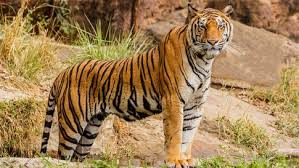

{
    "input_file": "C:\\Users\\BriefCam\\Desktop\\dsconnect\\predict\\images\\download (5).jpg",
    "probabilities": [
        {
            "butterfly": 0.12392014265060425
        },
        {
            "cat": 0.01516140066087246
        },
        {
            "chicken": 0.09391703456640244
        },
        {
            "cow": 0.5840928554534912
        },
        {
            "dog": 0.18290866911411285
        }
    ],
    "label": "cow"
}


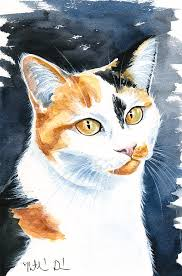

{
    "input_file": "C:\\Users\\BriefCam\\Desktop\\dsconnect\\predict\\images\\download (6).jpg",
    "probabilities": [
        {
            "butterfly": 5.0524391554063186e-05
        },
        {
            "cat": 0.9997660517692566
        },
        {
            "chicken": 3.186299363733269e-05
        },
        {
            "cow": 5.55137412447948e-05
        },
        {
            "dog": 9.605251398170367e-05
        }
    ],
    "label": "cat"
}


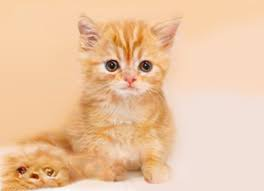

{
    "input_file": "C:\\Users\\BriefCam\\Desktop\\dsconnect\\predict\\images\\download.jpg",
    "probabilities": [
        {
            "butterfly": 5.7780343922786415e-05
        },
        {
            "cat": 0.9998937845230103
        },
        {
            "chicken": 2.3150067136157304e-05
        },
        {
            "cow": 8.02576687419787e-06
        },
        {
            "dog": 1.7206672055181116e-05
        }
    ],
    "label": "cat"
}


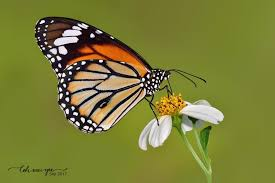

{
    "input_file": "C:\\Users\\BriefCam\\Desktop\\dsconnect\\predict\\images\\images (1).jpg",
    "probabilities": [
        {
            "butterfly": 0.9993906021118164
        },
        {
            "cat": 0.00012550511746667325
        },
        {
            "chicken": 3.6705965612782165e-05
        },
        {
            "cow": 6.759305688319728e-05
        },
        {
            "dog": 0.00037970751873217523
        }
    ],
    "label": "butterfly"
}


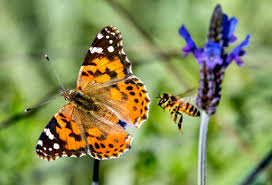

{
    "input_file": "C:\\Users\\BriefCam\\Desktop\\dsconnect\\predict\\images\\images (2).jpg",
    "probabilities": [
        {
            "butterfly": 0.9998267292976379
        },
        {
            "cat": 3.086328797508031e-05
        },
        {
            "chicken": 5.396489359554835e-05
        },
        {
            "cow": 8.85175268194871e-06
        },
        {
            "dog": 7.964139513205737e-05
        }
    ],
    "label": "butterfly"
}


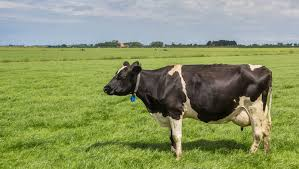

{
    "input_file": "C:\\Users\\BriefCam\\Desktop\\dsconnect\\predict\\images\\images (3).jpg",
    "probabilities": [
        {
            "butterfly": 0.0002812506863847375
        },
        {
            "cat": 2.238639171991963e-05
        },
        {
            "chicken": 0.0001079183493857272
        },
        {
            "cow": 0.998630166053772
        },
        {
            "dog": 0.0009582537459209561
        }
    ],
    "label": "cow"
}


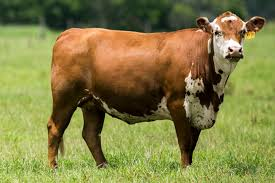

{
    "input_file": "C:\\Users\\BriefCam\\Desktop\\dsconnect\\predict\\images\\images (4).jpg",
    "probabilities": [
        {
            "butterfly": 0.0003723741683643311
        },
        {
            "cat": 6.60896475892514e-05
        },
        {
            "chicken": 0.00012312448234297335
        },
        {
            "cow": 0.9937680959701538
        },
        {
            "dog": 0.005670446902513504
        }
    ],
    "label": "cow"
}


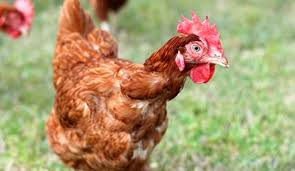

{
    "input_file": "C:\\Users\\BriefCam\\Desktop\\dsconnect\\predict\\images\\images (5).jpg",
    "probabilities": [
        {
            "butterfly": 0.0006163156358525157
        },
        {
            "cat": 0.004244036041200161
        },
        {
            "chicken": 0.9941341280937195
        },
        {
            "cow": 0.0004318302380852401
        },
        {
            "dog": 0.0005737346946261823
        }
    ],
    "label": "chicken"
}


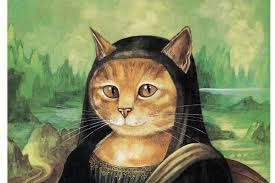

{
    "input_file": "C:\\Users\\BriefCam\\Desktop\\dsconnect\\predict\\images\\images (6).jpg",
    "probabilities": [
        {
            "butterfly": 0.051129572093486786
        },
        {
            "cat": 0.4244946539402008
        },
        {
            "chicken": 0.00123081193305552
        },
        {
            "cow": 0.017596088349819183
        },
        {
            "dog": 0.505548894405365
        }
    ],
    "label": "dog"
}


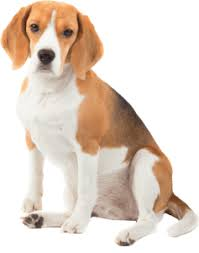

{
    "input_file": "C:\\Users\\BriefCam\\Desktop\\dsconnect\\predict\\images\\images.jpg",
    "probabilities": [
        {
            "butterfly": 0.0017590017523616552
        },
        {
            "cat": 0.019876956939697266
        },
        {
            "chicken": 0.002932705683633685
        },
        {
            "cow": 0.0005765600362792611
        },
        {
            "dog": 0.9748548269271851
        }
    ],
    "label": "dog"
}


In [19]:
# Places images in predict\images folder
# Output will also be found in output folder
# Note that when this is run, it overwrites all data in output folder
utils.predict_and_show(mlp)